In [35]:
import numpy as np
import matplotlib.pyplot as plt
import pathlib
import pandas as pd
from ecgdetectors import Detectors
import BLWR
import os
from scipy import io

In [14]:
# make dataset
X = np.array([])
y = np.array([])
classes = ['pvc', 'vt', 'sinus', 'nsvt']
DIrs = ['../patient data 2020.3.27', '../patient data 2']
cnt = 0

for Dir in DIrs:
    workDIr = os.path.abspath(Dir)
    print(workDIr)
    for (path, dir, files) in os.walk(workDIr):
        print(path)

#         for dirname in dirnames:
#             print("\t", dirname)

        for filename in files:
            ext = os.path.splitext(filename)[-1]
            if ext== '.csv':
                
#           if filename=='MUSE_20200219_134442_98000.csv' and ext== '.csv':
                print("\t", filename)
                print("path", path.split('\\')[-1])
                
                cnt+=1
                
                v1 = pd.read_csv(path + '/' + filename)
                feature = np.array(v1.iloc[:, [0]]).T[0]
                fs = feature.shape[0]/10
                
                if fs==500:
                    fs=50
                    feature = np.array([sum(feature[i:i+10])/10 for i in range(0, 5000, 10)])
                if fs==250:
                    fs=50
                    feature = np.array([sum(feature[i:i+5])/5 for i in range(0, 2500, 5)])

                
 
                    
                # normalization
                feature=feature/2000
                target = 'sinus'
                for clas in classes:
                    if clas in path.lower().split('/')[-1]:
                        target = clas
                detectors = Detectors(fs)
                
                r_peaks = detectors.pan_tompkins_detector(feature)
                r_feature = np.array([0]*500)
                for r in r_peaks:
                    r_feature[r] = 1
                
                feature = feature.reshape(500, 1)
                r_feature = r_feature.reshape(500, 1)
                feature = np.hstack((feature, r_feature))
                
                if len(X) == 0:
                    X = np.array([feature])
                    y = np.array(target)
                else:
                    X = np.vstack((X, [feature]))
                    y = np.vstack((y, target))


          

                
                
                
                
                
print(cnt)

              

/tf/notebooks/patient data 2020.3.27
/tf/notebooks/patient data 2020.3.27
/tf/notebooks/patient data 2020.3.27/11423425 - RVOT anteroseptal_ PVC LBBB
/tf/notebooks/patient data 2020.3.27/11423425 - RVOT anteroseptal_ PVC LBBB/08-JUL-2009-09.09.45 PVC LBBB
	 MUSE_20200204_155955_54000.csv
path /tf/notebooks/patient data 2020.3.27/11423425 - RVOT anteroseptal_ PVC LBBB/08-JUL-2009-09.09.45 PVC LBBB
/tf/notebooks/patient data 2020.3.27/11423425 - RVOT anteroseptal_ PVC LBBB/12-OCT-2009-10.29.50 PVC LBBB
	 MUSE_20200204_160248_35000.csv
path /tf/notebooks/patient data 2020.3.27/11423425 - RVOT anteroseptal_ PVC LBBB/12-OCT-2009-10.29.50 PVC LBBB
/tf/notebooks/patient data 2020.3.27/11423425 - RVOT anteroseptal_ PVC LBBB/17-DEC-2009-11.42.56 sinus rhythm
	 MUSE_20200204_160031_74000.csv
path /tf/notebooks/patient data 2020.3.27/11423425 - RVOT anteroseptal_ PVC LBBB/17-DEC-2009-11.42.56 sinus rhythm
/tf/notebooks/patient data 2020.3.27/11423425 - RVOT anteroseptal_ PVC LBBB/18-DEC-2009-13.0

/tf/notebooks/patient data 2020.3.27/14633012 - RVOT upper anteroseptal _PVC LBBB/25-MAR-2009-11.02.17 PVC LBBB
	 MUSE_20200204_140655_42000.csv
path /tf/notebooks/patient data 2020.3.27/14633012 - RVOT upper anteroseptal _PVC LBBB/25-MAR-2009-11.02.17 PVC LBBB
/tf/notebooks/patient data 2020.3.27/14888449 - RVOT upper anterior _ all sinus
/tf/notebooks/patient data 2020.3.27/14888449 - RVOT upper anterior _ all sinus/02-MAR-2010-15.32.09 sinus
	 MUSE_20200204_163717_22000.csv
path /tf/notebooks/patient data 2020.3.27/14888449 - RVOT upper anterior _ all sinus/02-MAR-2010-15.32.09 sinus
/tf/notebooks/patient data 2020.3.27/14888449 - RVOT upper anterior _ all sinus/03-MAR-2010-09.03.25 sinus
	 MUSE_20200204_163753_40000.csv
path /tf/notebooks/patient data 2020.3.27/14888449 - RVOT upper anterior _ all sinus/03-MAR-2010-09.03.25 sinus
/tf/notebooks/patient data 2020.3.27/14888449 - RVOT upper anterior _ all sinus/04-MAR-2010-09.12.39 sinus
	 MUSE_20200204_163753_40000.csv
path /tf/noteb

/tf/notebooks/patient data 2020.3.27/23342930 _ LV apical lateral _ PVC RBBB. LBBB/29-JUL-2009-10.00.06 sinus
	 MUSE_20200204_155205_49000.csv
path /tf/notebooks/patient data 2020.3.27/23342930 _ LV apical lateral _ PVC RBBB. LBBB/29-JUL-2009-10.00.06 sinus
/tf/notebooks/patient data 2020.3.27/27128662 _ RVOT No.9 _ PVC LBBB
/tf/notebooks/patient data 2020.3.27/27128662 _ RVOT No.9 _ PVC LBBB/01-DEC-2008-10.33.59 PVC LBBB
	 MUSE_20200203_170624_29000.csv
path /tf/notebooks/patient data 2020.3.27/27128662 _ RVOT No.9 _ PVC LBBB/01-DEC-2008-10.33.59 PVC LBBB
/tf/notebooks/patient data 2020.3.27/27128662 _ RVOT No.9 _ PVC LBBB/03-APR-2008-10.02.42 PVC LBBB
	 MUSE_20200203_165530_26000.csv
path /tf/notebooks/patient data 2020.3.27/27128662 _ RVOT No.9 _ PVC LBBB/03-APR-2008-10.02.42 PVC LBBB
/tf/notebooks/patient data 2020.3.27/27128662 _ RVOT No.9 _ PVC LBBB/04-APR-2008-09.25.57 PVC LBBB
	 MUSE_20200203_165440_09000.csv
path /tf/notebooks/patient data 2020.3.27/27128662 _ RVOT No.9 _ PVC 

/tf/notebooks/patient data 2020.3.27/30264324 _ LV fascicular VT _ all sinus/23-JUL-2008-15.52.34
	 MUSE_20200203_172919_25000.csv
path /tf/notebooks/patient data 2020.3.27/30264324 _ LV fascicular VT _ all sinus/23-JUL-2008-15.52.34
/tf/notebooks/patient data 2020.3.27/30842229 _ LV fascicular VT _ all sinus
/tf/notebooks/patient data 2020.3.27/30842229 _ LV fascicular VT _ all sinus/02-NOV-2009-14.16.12 sinus
	 MUSE_20200204_141145_87000.csv
path /tf/notebooks/patient data 2020.3.27/30842229 _ LV fascicular VT _ all sinus/02-NOV-2009-14.16.12 sinus
/tf/notebooks/patient data 2020.3.27/30842229 _ LV fascicular VT _ all sinus/13-APR-2009-14.15.26 sinus
	 MUSE_20200204_141109_81000.csv
path /tf/notebooks/patient data 2020.3.27/30842229 _ LV fascicular VT _ all sinus/13-APR-2009-14.15.26 sinus
/tf/notebooks/patient data 2020.3.27/30842229 _ LV fascicular VT _ all sinus/17-JUN-2009-09.13.25 sinus
	 MUSE_20200204_141236_02000.csv
path /tf/notebooks/patient data 2020.3.27/30842229 _ LV fasc

/tf/notebooks/patient data 2020.3.27/36394595 _ RVOT NO.4 _ PVC LBBB/23-JUN-2008-08.59.33 sinus
	 MUSE_20200204_133143_14000.csv
path /tf/notebooks/patient data 2020.3.27/36394595 _ RVOT NO.4 _ PVC LBBB/23-JUN-2008-08.59.33 sinus
/tf/notebooks/patient data 2020.3.27/36394595 _ RVOT NO.4 _ PVC LBBB/27-OCT-2008-13.54.15 sinus
	 MUSE_20200204_132912_62000.csv
path /tf/notebooks/patient data 2020.3.27/36394595 _ RVOT NO.4 _ PVC LBBB/27-OCT-2008-13.54.15 sinus
/tf/notebooks/patient data 2020.3.27/36591240 _ RVOT NO.3 _ PVC LBBB
/tf/notebooks/patient data 2020.3.27/36591240 _ RVOT NO.3 _ PVC LBBB/04-DEC-2009-16.00.12 PVC LBBB
	 MUSE_20200204_155816_36000.csv
path /tf/notebooks/patient data 2020.3.27/36591240 _ RVOT NO.3 _ PVC LBBB/04-DEC-2009-16.00.12 PVC LBBB
/tf/notebooks/patient data 2020.3.27/36591240 _ RVOT NO.3 _ PVC LBBB/10-DEC-2009-14.56.49 PVC LBBB
	 MUSE_20200204_155620_95000.csv
path /tf/notebooks/patient data 2020.3.27/36591240 _ RVOT NO.3 _ PVC LBBB/10-DEC-2009-14.56.49 PVC LBBB

/tf/notebooks/patient data 2020.3.27/38341256 _ RVOT low anterior _ PVC LBBB/19-JUN-2009-08.38.48 VT LBBB
	 MUSE_20200204_144435_72000.csv
path /tf/notebooks/patient data 2020.3.27/38341256 _ RVOT low anterior _ PVC LBBB/19-JUN-2009-08.38.48 VT LBBB
/tf/notebooks/patient data 2020.3.27/38341256 _ RVOT low anterior _ PVC LBBB/19-JUN-2009-10.09.05 sinus
	 MUSE_20200204_144518_82000.csv
path /tf/notebooks/patient data 2020.3.27/38341256 _ RVOT low anterior _ PVC LBBB/19-JUN-2009-10.09.05 sinus
/tf/notebooks/patient data 2020.3.27/38341256 _ RVOT low anterior _ PVC LBBB/25-JUN-2009-08.49.34 sinus
	 MUSE_20200204_144615_92000.csv
path /tf/notebooks/patient data 2020.3.27/38341256 _ RVOT low anterior _ PVC LBBB/25-JUN-2009-08.49.34 sinus
/tf/notebooks/patient data 2020.3.27/38341256 _ RVOT low anterior _ PVC LBBB/29-JUL-2009-09.37.37 PVC LBBB
	 MUSE_20200204_144832_41000.csv
path /tf/notebooks/patient data 2020.3.27/38341256 _ RVOT low anterior _ PVC LBBB/29-JUL-2009-09.37.37 PVC LBBB
/tf/no

/tf/notebooks/patient data 2020.3.27/38981306 _ RVOT anteroseptal _ PVC couplete LBBB/23-SEP-2009-23.32.51 sinus
	 MUSE_20200204_153341_81000.csv
path /tf/notebooks/patient data 2020.3.27/38981306 _ RVOT anteroseptal _ PVC couplete LBBB/23-SEP-2009-23.32.51 sinus
/tf/notebooks/patient data 2020.3.27/38981306 _ RVOT anteroseptal _ PVC couplete LBBB/24-SEP-2009-01.09.23 sinus
	 MUSE_20200204_153431_98000.csv
path /tf/notebooks/patient data 2020.3.27/38981306 _ RVOT anteroseptal _ PVC couplete LBBB/24-SEP-2009-01.09.23 sinus
/tf/notebooks/patient data 2020.3.27/38981306 _ RVOT anteroseptal _ PVC couplete LBBB/24-SEP-2009-01.42.26 PVC couplete LBBB
	 MUSE_20200204_153508_21000.csv
path /tf/notebooks/patient data 2020.3.27/38981306 _ RVOT anteroseptal _ PVC couplete LBBB/24-SEP-2009-01.42.26 PVC couplete LBBB
/tf/notebooks/patient data 2020.3.27/38981306 _ RVOT anteroseptal _ PVC couplete LBBB/28-SEP-2009-11.20.28 sinus
	 MUSE_20200204_153139_29000.csv
path /tf/notebooks/patient data 2020.3

/tf/notebooks/patient data 2/PVC 2nd data/LBBB/12270701 - LV summit VT - PVC LBBB_atypical morphology/13-SEP-2012-17.06.37 PVC LBBB
	 MUSE_20200213_143912_61000.csv
path /tf/notebooks/patient data 2/PVC 2nd data/LBBB/12270701 - LV summit VT - PVC LBBB_atypical morphology/13-SEP-2012-17.06.37 PVC LBBB
/tf/notebooks/patient data 2/PVC 2nd data/LBBB/12270701 - LV summit VT - PVC LBBB_atypical morphology/13-SEP-2012-18.19.16 PVC LBBB
	 MUSE_20200213_143941_82000.csv
path /tf/notebooks/patient data 2/PVC 2nd data/LBBB/12270701 - LV summit VT - PVC LBBB_atypical morphology/13-SEP-2012-18.19.16 PVC LBBB
/tf/notebooks/patient data 2/PVC 2nd data/LBBB/12270701 - LV summit VT - PVC LBBB_atypical morphology/25-SEP-2012-10.04.06 sinus
	 MUSE_20200213_144011_02000.csv
path /tf/notebooks/patient data 2/PVC 2nd data/LBBB/12270701 - LV summit VT - PVC LBBB_atypical morphology/25-SEP-2012-10.04.06 sinus
/tf/notebooks/patient data 2/PVC 2nd data/LBBB/12862807 - LVOT NCC -  PVC.NSVT LBBB
/tf/notebooks/pa

/tf/notebooks/patient data 2/PVC 2nd data/LBBB/13163659 - RVOT septum - PVC.NSVT LBBB/27-MAY-2013-14.43.09 NSVT LBBB
	 MUSE_20200217_161705_64000.csv
path /tf/notebooks/patient data 2/PVC 2nd data/LBBB/13163659 - RVOT septum - PVC.NSVT LBBB/27-MAY-2013-14.43.09 NSVT LBBB
/tf/notebooks/patient data 2/PVC 2nd data/LBBB/13163659 - RVOT septum - PVC.NSVT LBBB/28-MAY-2013-13.45.22 PVC LBBB
	 MUSE_20200217_161734_85000.csv
path /tf/notebooks/patient data 2/PVC 2nd data/LBBB/13163659 - RVOT septum - PVC.NSVT LBBB/28-MAY-2013-13.45.22 PVC LBBB
/tf/notebooks/patient data 2/PVC 2nd data/LBBB/13163659 - RVOT septum - PVC.NSVT LBBB/29-MAY-2013-07.29.16 sinus
	 MUSE_20200217_161811_07000.csv
path /tf/notebooks/patient data 2/PVC 2nd data/LBBB/13163659 - RVOT septum - PVC.NSVT LBBB/29-MAY-2013-07.29.16 sinus
/tf/notebooks/patient data 2/PVC 2nd data/LBBB/13163659 - RVOT septum - PVC.NSVT LBBB/30-MAY-2013-06.17.00 NSVT LBBB
	 MUSE_20200217_161854_25000.csv
path /tf/notebooks/patient data 2/PVC 2nd da

/tf/notebooks/patient data 2/PVC 2nd data/LBBB/16348473 - RVOT subpulmonic valve - PVC LBBB/17-MAY-2010-11.34.06 sinus
	 MUSE_20200205_144024_90000.csv
path /tf/notebooks/patient data 2/PVC 2nd data/LBBB/16348473 - RVOT subpulmonic valve - PVC LBBB/17-MAY-2010-11.34.06 sinus
/tf/notebooks/patient data 2/PVC 2nd data/LBBB/16348473 - RVOT subpulmonic valve - PVC LBBB/19-APR-2010-16.12.00 sinus
	 MUSE_20200205_144151_29000.csv
path /tf/notebooks/patient data 2/PVC 2nd data/LBBB/16348473 - RVOT subpulmonic valve - PVC LBBB/19-APR-2010-16.12.00 sinus
/tf/notebooks/patient data 2/PVC 2nd data/LBBB/16348473 - RVOT subpulmonic valve - PVC LBBB/19-MAY-2010-16.57.44 sinus
	 MUSE_20200205_143905_53000.csv
path /tf/notebooks/patient data 2/PVC 2nd data/LBBB/16348473 - RVOT subpulmonic valve - PVC LBBB/19-MAY-2010-16.57.44 sinus
/tf/notebooks/patient data 2/PVC 2nd data/LBBB/16348473 - RVOT subpulmonic valve - PVC LBBB/20-MAY-2010-10.01.09 sinus
	 MUSE_20200205_143941_70000.csv
path /tf/notebooks/p

/tf/notebooks/patient data 2/PVC 2nd data/LBBB/22172525 - RVOT anteroseptal - PVC LBBB/22-APR-2011-09.04.37 PVC LBBB
	 MUSE_20200207_162046_98000.csv
path /tf/notebooks/patient data 2/PVC 2nd data/LBBB/22172525 - RVOT anteroseptal - PVC LBBB/22-APR-2011-09.04.37 PVC LBBB
/tf/notebooks/patient data 2/PVC 2nd data/LBBB/22172525 - RVOT anteroseptal - PVC LBBB/23-APR-2011-08.43.09 PVC LBBB
	 MUSE_20200207_161830_59000.csv
path /tf/notebooks/patient data 2/PVC 2nd data/LBBB/22172525 - RVOT anteroseptal - PVC LBBB/23-APR-2011-08.43.09 PVC LBBB
/tf/notebooks/patient data 2/PVC 2nd data/LBBB/22172525 - RVOT anteroseptal - PVC LBBB/24-APR-2011-09.06.05 PVC LBBB
	 MUSE_20200207_162304_65000.csv
path /tf/notebooks/patient data 2/PVC 2nd data/LBBB/22172525 - RVOT anteroseptal - PVC LBBB/24-APR-2011-09.06.05 PVC LBBB
/tf/notebooks/patient data 2/PVC 2nd data/LBBB/22172525 - RVOT anteroseptal - PVC LBBB/24-APR-2011-09.06.20 PVC LBBB
	 MUSE_20200207_162123_15000.csv
path /tf/notebooks/patient data 2/

/tf/notebooks/patient data 2/PVC 2nd data/LBBB/23051931 - RVOT No.3 and 6 - PVC LBBB - JPG파일없음/sinus RBBB
	 MUSE_20200224_161400_06000.csv
path /tf/notebooks/patient data 2/PVC 2nd data/LBBB/23051931 - RVOT No.3 and 6 - PVC LBBB - JPG파일없음/sinus RBBB
/tf/notebooks/patient data 2/PVC 2nd data/LBBB/23238529 - RV TA 5'oclock - PVC LBBB
/tf/notebooks/patient data 2/PVC 2nd data/LBBB/23238529 - RV TA 5'oclock - PVC LBBB/02-MAR-2011-11.52.51sinus
	 MUSE_20200211_155837_93000.csv
path /tf/notebooks/patient data 2/PVC 2nd data/LBBB/23238529 - RV TA 5'oclock - PVC LBBB/02-MAR-2011-11.52.51sinus
/tf/notebooks/patient data 2/PVC 2nd data/LBBB/23238529 - RV TA 5'oclock - PVC LBBB/06-MAR-2011-02.43.28sinus
	 MUSE_20200211_155921_12000.csv
path /tf/notebooks/patient data 2/PVC 2nd data/LBBB/23238529 - RV TA 5'oclock - PVC LBBB/06-MAR-2011-02.43.28sinus
/tf/notebooks/patient data 2/PVC 2nd data/LBBB/23238529 - RV TA 5'oclock - PVC LBBB/12-AUG-2011-13.46.10sinus
	 MUSE_20200211_155957_29000.csv
path /t

/tf/notebooks/patient data 2/PVC 2nd data/LBBB/24795638 - RVOT suprapulmonic v - PVC LBBB/17-JUN-2010-11.29.33 PVC LBBB
	 MUSE_20200205_162113_76000.csv
path /tf/notebooks/patient data 2/PVC 2nd data/LBBB/24795638 - RVOT suprapulmonic v - PVC LBBB/17-JUN-2010-11.29.33 PVC LBBB
/tf/notebooks/patient data 2/PVC 2nd data/LBBB/24795638 - RVOT suprapulmonic v - PVC LBBB/18-JUN-2010-13.29.05
	 MUSE_20200205_162156_96000.csv
path /tf/notebooks/patient data 2/PVC 2nd data/LBBB/24795638 - RVOT suprapulmonic v - PVC LBBB/18-JUN-2010-13.29.05
/tf/notebooks/patient data 2/PVC 2nd data/LBBB/24795638 - RVOT suprapulmonic v - PVC LBBB/19-JUN-2010-08.33.52
	 MUSE_20200205_162233_07000.csv
path /tf/notebooks/patient data 2/PVC 2nd data/LBBB/24795638 - RVOT suprapulmonic v - PVC LBBB/19-JUN-2010-08.33.52
/tf/notebooks/patient data 2/PVC 2nd data/LBBB/24795638 - RVOT suprapulmonic v - PVC LBBB/23-NOV-2010-08.53.13 APC
	 MUSE_20200205_162621_89000.csv
path /tf/notebooks/patient data 2/PVC 2nd data/LBBB/24

/tf/notebooks/patient data 2/PVC 2nd data/RBBB/06-APR-2014-13.54.37 NSVT RBBB
	 MUSE_20200219_134512_11000.csv
path /tf/notebooks/patient data 2/PVC 2nd data/RBBB/06-APR-2014-13.54.37 NSVT RBBB
/tf/notebooks/patient data 2/PVC 2nd data/RBBB/06-APR-2014-16.01.28 NSVT RBBB
	 MUSE_20200219_134548_27000.csv
path /tf/notebooks/patient data 2/PVC 2nd data/RBBB/06-APR-2014-16.01.28 NSVT RBBB
/tf/notebooks/patient data 2/PVC 2nd data/RBBB/07-APR-2014-02.17.14 NSVT RBBB
	 MUSE_20200219_134845_56000.csv
path /tf/notebooks/patient data 2/PVC 2nd data/RBBB/07-APR-2014-02.17.14 NSVT RBBB
/tf/notebooks/patient data 2/PVC 2nd data/RBBB/07-APR-2014-07.39.31 NSVT RBBB
	 MUSE_20200219_135025_86000.csv
path /tf/notebooks/patient data 2/PVC 2nd data/RBBB/07-APR-2014-07.39.31 NSVT RBBB
/tf/notebooks/patient data 2/PVC 2nd data/RBBB/07-APR-2014-19.49.13 PVC RBBB
	 MUSE_20200219_135159_19000.csv
path /tf/notebooks/patient data 2/PVC 2nd data/RBBB/07-APR-2014-19.49.13 PVC RBBB
/tf/notebooks/patient data 2/PVC

/tf/notebooks/patient data 2/PVC 2nd data/RBBB/18473313 - LV VT - PVC RBBB/31-JUL-2013-10.59.42
	 MUSE_20200217_174052_08000.csv
path /tf/notebooks/patient data 2/PVC 2nd data/RBBB/18473313 - LV VT - PVC RBBB/31-JUL-2013-10.59.42
/tf/notebooks/patient data 2/PVC 2nd data/RBBB/19-OCT-2012-09.51.29 VT RBBB
	 MUSE_20200213_151323_21000.csv
path /tf/notebooks/patient data 2/PVC 2nd data/RBBB/19-OCT-2012-09.51.29 VT RBBB
/tf/notebooks/patient data 2/PVC 2nd data/RBBB/19-OCT-2012-09.56.14 VT RBBB
	 MUSE_20200213_151352_30000.csv
path /tf/notebooks/patient data 2/PVC 2nd data/RBBB/19-OCT-2012-09.56.14 VT RBBB
/tf/notebooks/patient data 2/PVC 2nd data/RBBB/19-OCT-2012-11.38.26 VT RBBB
	 MUSE_20200213_151428_44000.csv
path /tf/notebooks/patient data 2/PVC 2nd data/RBBB/19-OCT-2012-11.38.26 VT RBBB
/tf/notebooks/patient data 2/PVC 2nd data/RBBB/21-JUL-2014-10.38.27 PVC RBBB
	 MUSE_20200219_140702_63000.csv
path /tf/notebooks/patient data 2/PVC 2nd data/RBBB/21-JUL-2014-10.38.27 PVC RBBB
/tf/note

/tf/notebooks/patient data 2/PVC 2nd data/RBBB/21673289 - LVVT ro SVT - VT RBBB/07-JUL-2012-13.03.39 sinus
	 MUSE_20200212_150423_68000.csv
path /tf/notebooks/patient data 2/PVC 2nd data/RBBB/21673289 - LVVT ro SVT - VT RBBB/07-JUL-2012-13.03.39 sinus
/tf/notebooks/patient data 2/PVC 2nd data/RBBB/21673289 - LVVT ro SVT - VT RBBB/08-APR-2012-08.22.42 sinus
	 MUSE_20200212_145513_07000.csv
path /tf/notebooks/patient data 2/PVC 2nd data/RBBB/21673289 - LVVT ro SVT - VT RBBB/08-APR-2012-08.22.42 sinus
/tf/notebooks/patient data 2/PVC 2nd data/RBBB/21673289 - LVVT ro SVT - VT RBBB/08-JUL-2012-06.19.36 sinus
	 MUSE_20200212_150506_86000.csv
path /tf/notebooks/patient data 2/PVC 2nd data/RBBB/21673289 - LVVT ro SVT - VT RBBB/08-JUL-2012-06.19.36 sinus
/tf/notebooks/patient data 2/PVC 2nd data/RBBB/21673289 - LVVT ro SVT - VT RBBB/10-APR-2012-07.15.29 sinus
	 MUSE_20200212_145549_18000.csv
path /tf/notebooks/patient data 2/PVC 2nd data/RBBB/21673289 - LVVT ro SVT - VT RBBB/10-APR-2012-07.15.2

/tf/notebooks/patient data 2/PVC 2nd data/RBBB/23382116 - LV basalseptum - PVC RBBB/sinus
	 MUSE_20200205_165100_64000.csv
path /tf/notebooks/patient data 2/PVC 2nd data/RBBB/23382116 - LV basalseptum - PVC RBBB/sinus
/tf/notebooks/patient data 2/PVC 2nd data/RBBB/25-JUL-2014-10.15.36 PVC RBBB
	 MUSE_20200219_140820_83000.csv
path /tf/notebooks/patient data 2/PVC 2nd data/RBBB/25-JUL-2014-10.15.36 PVC RBBB
/tf/notebooks/patient data 2/PVC 2nd data/RBBB/25-MAR-2015-14.01.21 PVC RBBB
	 MUSE_20200224_143108_42000.csv
path /tf/notebooks/patient data 2/PVC 2nd data/RBBB/25-MAR-2015-14.01.21 PVC RBBB
/tf/notebooks/patient data 2/PVC 2nd data/RBBB/25377963 LV PM VT - PVC RBBB
/tf/notebooks/patient data 2/PVC 2nd data/RBBB/25377963 LV PM VT - PVC RBBB/23-NOV-2016-13.11.01 PVC RBBB
	 MUSE_20200226_165449_39000.csv
path /tf/notebooks/patient data 2/PVC 2nd data/RBBB/25377963 LV PM VT - PVC RBBB/23-NOV-2016-13.11.01 PVC RBBB
/tf/notebooks/patient data 2/PVC 2nd data/RBBB/25377963 LV PM VT - PVC R

In [15]:
y=y.flatten()

In [16]:
io.savemat('testCSV(LSTM)_divideMax_half.mat', {'data': X, 'label': y})

In [8]:
types = {'pvc': 0, 'vt': 1, 'sinus': 2, 'nsvt': 3}

tmp = []
for i in y:
    tmp.append(types[i])
y = np.array(tmp)



In [9]:
print(y.shape)
print(X.shape)
print(X[0])

(539,)
(539, 2500, 2)
[[-0.0195  0.    ]
 [-0.0195  0.    ]
 [-0.0195  0.    ]
 ...
 [ 0.04    0.    ]
 [ 0.034   0.    ]
 [ 0.034   0.    ]]


In [17]:
for i in X:
    for j in i:
        if j[1] ==0:
            j[0] = 0
            

In [18]:
for i in X:
    for j in i:
        print(j)

[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0.04925 1.     ]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0.0954 1.    ]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.

[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[-0.0235  1.    ]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0.03835 1.     ]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 

[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[-0.29425  1.     ]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[-0.032  1.   ]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[-0.0217  1.    ]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0

[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[-0.00495  1.     ]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[-0.03495  1.     ]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]


[0. 0.]
[0. 0.]
[0.01075 1.     ]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0.80055 1.     ]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[-0.1323  1.    ]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0.71565 1.     ]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0.0951 1.    ]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0.81565 1.     ]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.

[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[-0.02645  1.     ]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0.0241 1.    ]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 

[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0.06645 1.     ]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[-0.0232  1.    ]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0.1522 1.    ]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 

[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[-0.08615  1.     ]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0.13535 1.     ]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0

[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[-0.011  1.   ]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0.051 1.   ]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0.008 1.   ]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 

[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0.108 1.   ]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0.1007 1.    ]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0.0935 1.    ]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0

[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0.136 1.   ]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0.1095 1.    ]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0.0574 1.    ]
[0. 0.]
[0

[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[-0.01395  1.     ]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0.15435 1.     ]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[-0.00645  1.     ]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.

[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0.0598 1.    ]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0.0385 1.    ]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0.049 1.   ]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0.058 1.   ]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 

[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0.06775 1.     ]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0.03425 1.     ]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0.0207 1.    ]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 

[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[-0.009  1.   ]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0.06075 1.     ]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0.06855 1.     ]
[0. 0.]
[0. 

[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0.0449 1.    ]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0.04725 1.     ]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0.029 1.   ]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]


[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[-0.43755  1.     ]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[-0.03525  1.     ]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]


[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0.02775 1.     ]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0.028 1.   ]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[-0.29865  1.     ]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 

[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0.0047 1.    ]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[-0.0014  1.    ]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.

[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0.00725 1.     ]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0.05685 1.     ]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0.11595 1.     ]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0

[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[-9.e-04  1.e+00]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0.00825 1.     ]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0.0295 1.    ]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0.0215 1.    ]
[0. 0.]
[0. 

[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0.0194 1.    ]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0.04875 1.     ]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.

[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0.07755 1.     ]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0.0095 1.    ]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.

[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0.0855 1.    ]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0.0609 1.    ]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]


[-0.00165  1.     ]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0.0155 1.    ]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0.017 1.   ]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0.00455 1.     ]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 

[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[-0.0155  1.    ]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[-0.02875  1.     ]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[-0.0485  1.    ]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]


[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0.073 1.   ]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0.0655 1.    ]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0.0585 1.    ]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0

[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0.0615 1.    ]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0.0611 1.    ]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0.064 1.   ]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0

[0.0085 1.    ]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[-0.0984  1.    ]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[-0.1415  1.    ]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[-0.0565  1.    ]
[0

KeyboardInterrupt: 

In [19]:
X.shape

(539, 500, 2)

In [24]:
Test = io.loadmat('./testCSV(LSTM)_divideMax_half.mat')
X, y = Test['data'], Test['label']

In [27]:
X[0].shape
x=[i[0] for i in X[0]]
r = [i[1] for i in X[0]]

In [32]:
print(r)

[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,

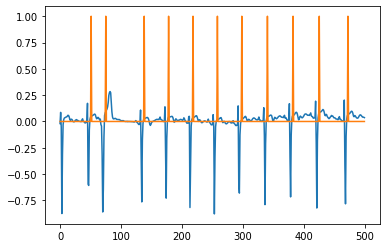

In [33]:
plt.plot([i for i in range(500)], x)
plt.plot(r)
plt.show()

In [41]:
a = pd.read_csv('./101.csv')

In [47]:
b = np.array(a.iloc[:, [2]])

In [52]:
c = np.array(b.T[0])

In [53]:
c.shape

(650000,)

In [ ]:
plt.plot([i for i in range(650000)], )